# PROJECT   : HABERMAN'S CANCER SURVIVAL DATA EXPLORATORY   ANALYSIS

#### <u>AUTEUR</u>: ADZAWLA KUDZO VENUNYE

### INTRODUCTION

<strong>Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between
year 1958 to 1970 for the patients who undergone surgery of breast cancer.</strong>

<strong> SOURCE: (https://www.kaggle.com/gilsousa/habermans-survival-data-set)</strong>

### OBJECTIVES

<strong> There are four (04) attributes in this dataset out of which 03 are features and 01 a class attribute.</strong>

##### THE MAIN OBJECTIVE OF THIS EXPLORATORY DATA ANALYSIS IS TO PREPARE THE DATA FOR CLASSIFICATION MODEL BUILDING

### FEATURES DESCRIPTION

<strong>. Age                               :           age of the patients who have undergone the breast cancer surgery

    
    
. Year                              :           Year in which every patient has undergone the surgery. It ranges from 1958 to   1970
      
    
    
    
    
. Positive Axiliary Nodes deteted   :           Breast cancer usually spreads to the axillary lymph nodes before those at any 
 other location. Given their close proximity to the breasts, these lymph nodes are a common place where breast cancer spreads.
As a general rule, when cancer spreads from its starting point, it becomes harder to treat. The outlook also worsens.
See below an illustration picture.




<img src="Axillary.png" width=500 height=400 />



. Survival status        : It indicates whether the patient survived more than 5 years or less after undergone through surgery. If patients Survival status (class attribute) 1 = the patient survived 5 years or longer, and if Survival status equals to 2 then the patient died within 5 year. </strong>

### DATA MANIPULATION

In [1]:
# The libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# IMPORTING THE DATA SET FROM MY LOCAL DIRECTORY
data=pd.read_csv("C:/Users/PC/Desktop/APPLIEDAI.COURSE/ASSIGNEMENTS/ASSIGNEMENT 04/haberman.csv", names=["Age", "Year", "node_detected", "survival_status"])
data.head()

,Age,Year,node_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# EXAMINING THE TOTAL NUMBER OF DATA POINTS AND COLUMNS IN THE DATA SET

data.shape

(306, 4)

In [4]:
# CHECKING FOR MISSING VALUES
data.isna().sum()

Age                0
Year               0
node_detected      0
survival_status    0
dtype: int64

In [5]:
# CHECKING FOR GENERAL INFORMATION ABOUT THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Year               306 non-null int64
node_detected      306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### OBSERVATION 

<strong>  
1.   There are 306 data points and 4 columns in the dataset. 



2.   The dataset contains no missing values.



3.   The target variable is Survival_status. It is of numerical type and make no sense 
     since its values are 1 and 2.
     
    

4.   We need to convert the target variable to category and map its values to "Yes" and "No" to make it more meaningful </strong>


### UNIVARIATE ANALISIS

<p><strong>The purpose of this section is to summarize, describe and find pattern in the data </strong></p>

In [6]:
#CHANGING THE TARGET VARIABLES DATA TYPE AND RENAMING THE VALUES

data["survival_status"]=data["survival_status"].map({1:"Yes", 2:"No"})
data["survival_status"]=data["survival_status"].astype("category")


In [7]:
data.head()

,Age,Year,node_detected,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [8]:
# EXAMING THE NUMERICAL FEATURES

data.describe()

,Age,Year,node_detected
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
# Computing the median and the mode
print("The median of the variable Age is:", (np.median(data["Age"])))
print("The median of the variable Year is:",(np.median(data["Year"])))
print("The median of the variable node_detected is:",(np.median(data["node_detected"])))

The median of the variable Age is: 52.0
The median of the variable Year is: 63.0
The median of the variable node_detected is: 1.0


In [10]:
data["Year"].value_counts(normalize=True)

58    0.117647
64    0.101307
63    0.098039
66    0.091503
65    0.091503
60    0.091503
59    0.088235
61    0.084967
67    0.081699
62    0.075163
68    0.042484
69    0.035948
Name: Year, dtype: float64

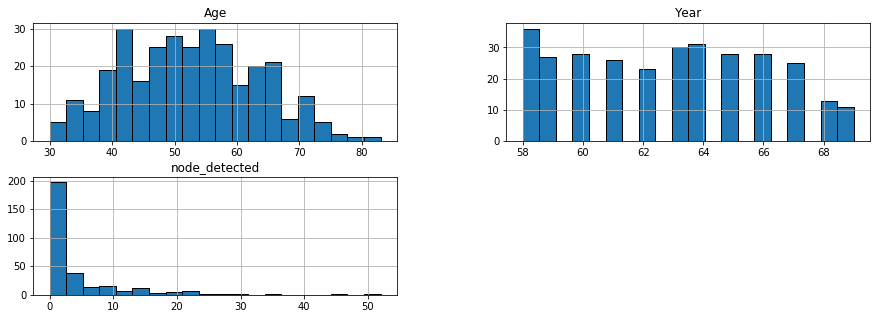

In [11]:
# Ploting the nuerical features

data[["Age", "Year","node_detected"]].hist(edgecolor="black", bins=20, figsize=(15, 5));

In [12]:
# FOCUS ON THE TARGET VARIABLE

data["survival_status"].value_counts(normalize=True)

Yes    0.735294
No     0.264706
Name: survival_status, dtype: float64

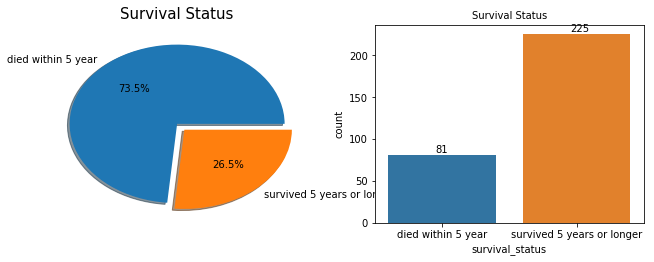

In [13]:
#This code is inspired  from https://ninjakx.github.io/haberman/


f,ax = plt.subplots(1,2,figsize=(9,4))
data['survival_status'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],labels=['died within 5 year', 'survived 5 years or longer'],fontsize=10, shadow=True)
ax[0].set_title('Survival Status',fontsize=15)
ax[0].set_ylabel('')
f.tight_layout(pad=2) 


sb.countplot(data['survival_status'], ax=ax[1])
ax[1].set_title('Survival Status',fontsize=10)
ax[1].set_xticklabels(labels=['died within 5 year', 'survived 5 years or longer'],fontsize=10)
for p in ax[1].patches:
    ax[1].annotate('{:d}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+3),fontsize=10)
f.tight_layout(pad=2)    
    
plt.show()




In [14]:

#survival=data["survival_status"].value_counts(normalize=True)

#plt.pie(survival, labels=survival.index, startangle=90, counterclock=False, wedgeprops={"width":0.8})
#plt.axis("square");

#### OBSERVATION 
<strong>
1. The Age of the patients range from 30 to 83 years. The mean age is almost equal to the meadian age. We can      consider Age to be normaly distributed.


2. 25% of the patients are between 30 and 40 years, and 75% of the patients are between 30 and 60 years.


3. The Years which the patients have undergone the surgery lie between 58 (1958) and 69 (1969). Most of the patients underwent surgery in    1958 (12% of patients).


4. The variable node_detected is right-asymetric. The first 25% of the patients have no positive axiliary node detected; and the    first 75 % of the patients have less than 4 positive axiliary nodes detected.


5. Most of the patients survided 5 five years or longer(225 or 74% of the patients) and 81 patients (26% or almost one quarter of patients) died within 5        years. Thence, the target variable is an umbalanced one.</strong>

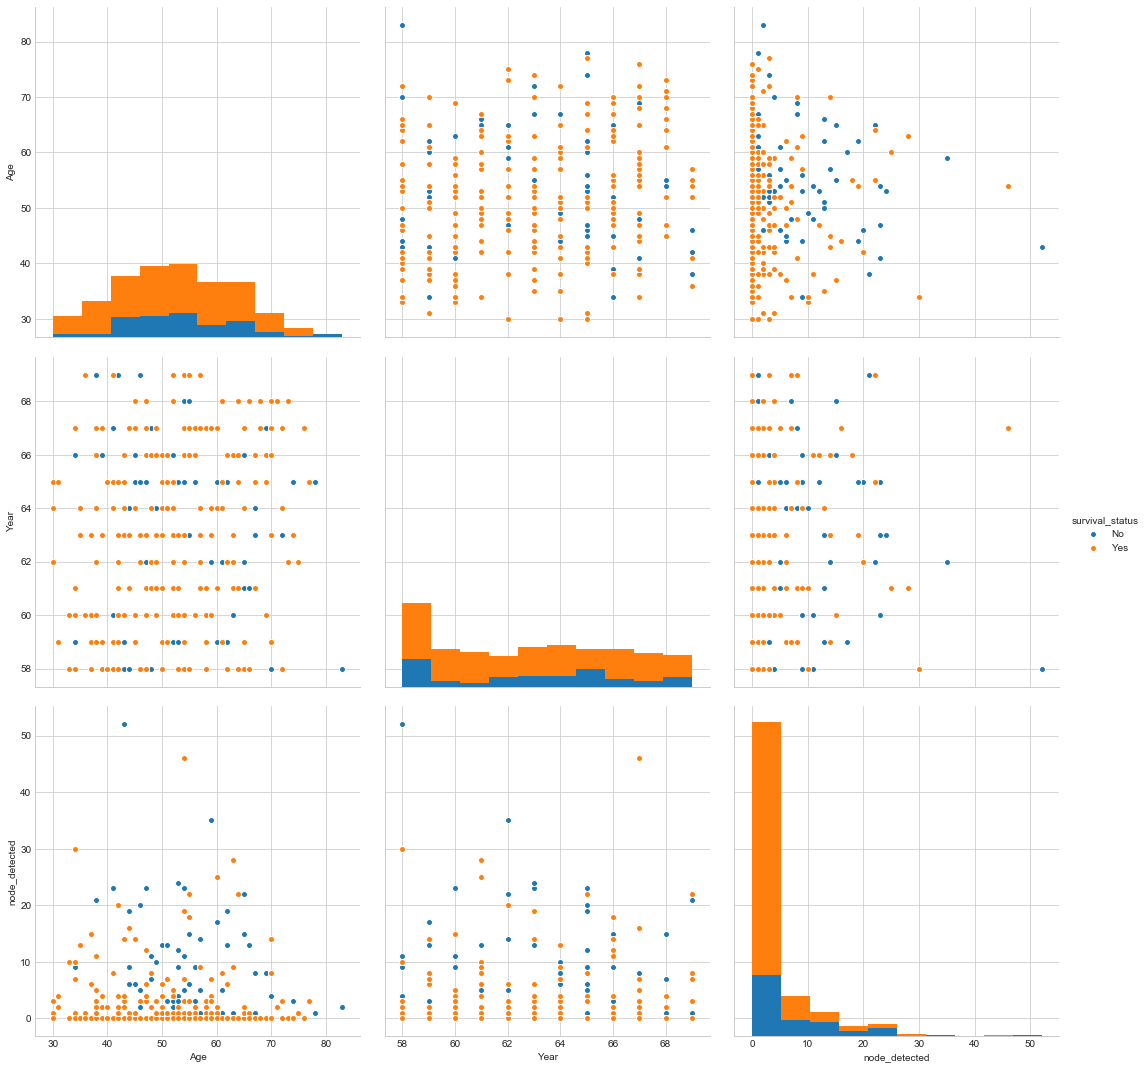

In [15]:
# We are looking for pair features combinations that enable to easily identify the differents survival status

# We are going to use the seaborn Pairplot method to handle this

plt.close()

sb.set_style("whitegrid")
sb.pairplot(data, hue="survival_status", size=5)
plt.show()


##### OBSERVATION 

<strong>1- We can see that only the variable "note_detected" offers a good view on values compared to other variables. Thence this is the most usefull feature to describe survival status.So, for the remaining part of our analysis, "note_detected" is going to be the variable of focus.

2- It is difficult to find a line or "if-else" conditions to build a simple model to classify the "survival_status"
</strong>

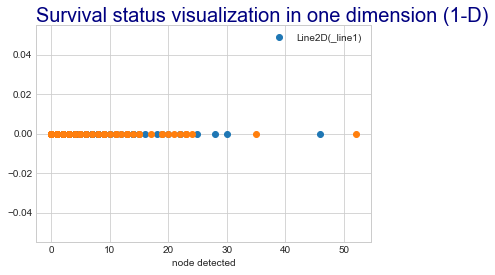

In [16]:
# Spliting the target variable according to its values

data_yes=data.loc[data["survival_status"]=="Yes"]
data_nos=data.loc[data["survival_status"]=="No"]

yes=plt.plot(data_yes["node_detected"], np.zeros_like(data_yes["node_detected"]), "o")

no=plt.plot(data_nos["node_detected"], np.zeros_like(data_nos["node_detected"]), "o");

plt.title("Survival status visualization in one dimension (1-D)", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
plt.legend(yes, no)
plt.xlabel("node detected");


#### OBSERVATION 

<strong>We notice from the above plot that the two types of survival status overlap each other. 
Thence, we can not draw any conclusion so far.</strong>

#### PROBABILITY DENSITY FUNCTIONS

<strong>The probability Density Function (PDF) is the probability that the variable takes a value x.(a smoothed version of the histogram)</strong>

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


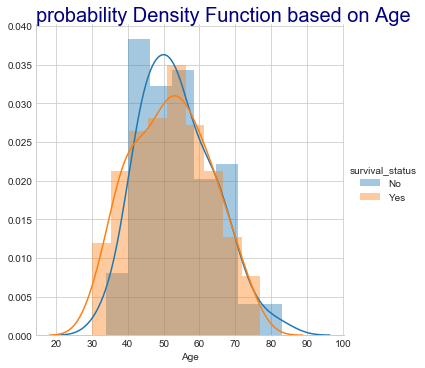

In [17]:

# probability Density Function of Age

sb.FacetGrid(data, hue="survival_status", size=5)\
.map(sb.distplot, "Age")\
.add_legend()
plt.title("probability Density Function based on Age", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")
plt.show()

#### OBSERVATION

<strong> 
    1- We observe a major overlaping of data which amount to ambiguity. This also implies that chances to survive is 
    independent to the patient's age.</strong>
    
<strong>  
    2- But by close observation, we can mention that patients whose age lie between 30 and 40 years are most likely to survive, and those who are between 40 to 60 are less likely to survive; while people whose age is in the range 60-75 have equal chances to survive or not to survive.</strong>
    
<strong>    
    3- By The Age variable, we cannot draw yet a conclusion about survival chances of a patient.</strong>



C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


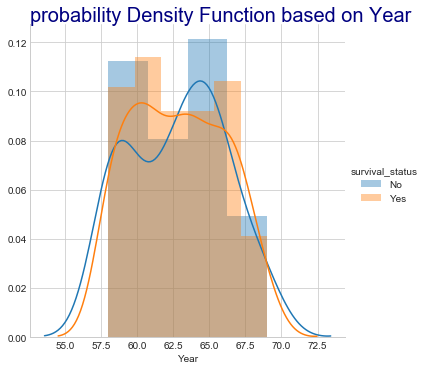

In [18]:
 ## Probability Density Function considering the variable Year

sb.FacetGrid(data, hue="survival_status", size=5)\
.map(sb.distplot, "Year")\
.add_legend()
plt.title("probability Density Function based on Year", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")
plt.show()


#### OBSERVATION

<strong>
 There is a major overlap between survival status class labels which implies that The operation year 
is not a good feature that can help to classify the survival status of the patients.
</strong>

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


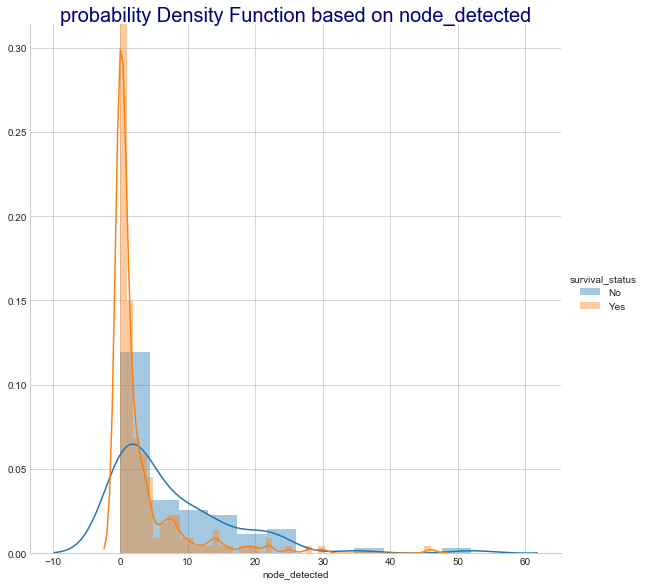

In [19]:

#probability Density Function of node_detected

sb.FacetGrid(data, hue="survival_status", size=8)\
.map(sb.distplot, "node_detected")\
.add_legend()
plt.title("probability Density Function based on node_detected", fontsize=20, color="navy", loc="center", 
          fontstyle="normal", pad='3.0')
print("\n")
plt.show()


#### OBSERVATION

<strong> 
1- Though there is overlap of the calss values, we can make a distinctive observation.

2- There is high chance for a patient to survive with zero positive axiliary nodes detected.

3- There is almost no chance to survived with more than 25 positive axiliary nodes detected.

4- Node detected will be the preferred feature to consider in survival status classification.
</strong> 

### CUMULATIVE DENSITY FUNCTIONS

<strong>
* For the purpose to base our prediction on quantitive values, we are going to take a look at cumulative density functions 
based on the Age, Year and Node detected features.
    
    
* The area under the plot of PDF over an interval represents the probability of occurrence of a random variable in that interval. Mathematically, CDF is an integral of PDF over the range of values that a continuous random variable takes.


* The CDF of a random variable evaluated at any point ‘x’ gives the probability that a random variable will take a value less than or equal to ‘x’
</strong>


 ********* Age ********* 

Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]

 ********* Year ********* 

Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]

 ********* node_detected ********* 

Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.   

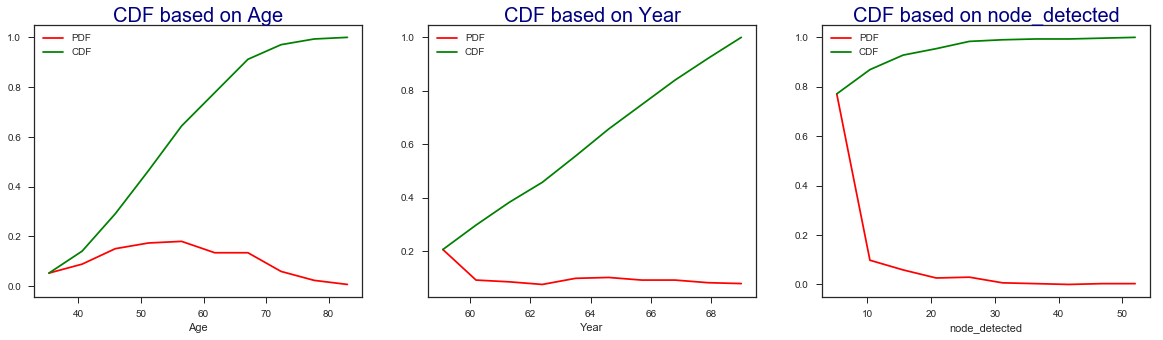

In [29]:
## The CDF considering each feature

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
   
    print("\n", "********* "+feature+" *********", "\n")
    
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.title("CDF based on " + feature , fontsize=20, color="navy", loc="center", 
          fontstyle="normal", pad='3.0')
    plt.plot(bin_edges[1:], pdf, 'r-', label="PDF")
    plt.plot(bin_edges[1:], cdf, 'g-', label="CDF")
    plt.xlabel(feature)
    plt.legend()
    
    #plt.legend(handles=([pdf, cdf] , ["pdf", "cdf"]))

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]




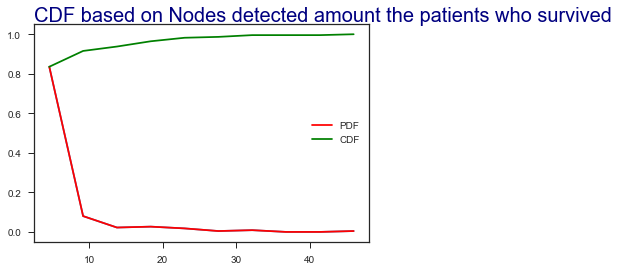

In [30]:
# # CDF based on Nodes detected and the status of those who survived

counts, bin_edges = np.histogram(data_yes['node_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.title("CDF based on Nodes detected amount the patients who survived", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")
plt.plot(bin_edges[1:], pdf,'r-', label="PDF")
plt.plot(bin_edges[1:], cdf,'g-',label="CDF")

plt.legend()

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]




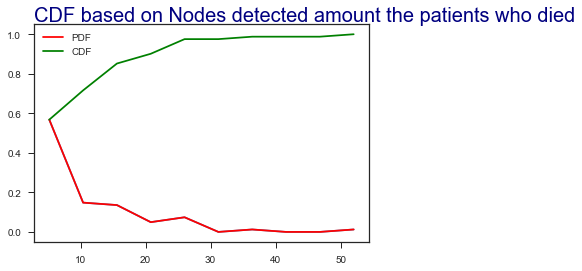

In [28]:
# CDF based on Nodes detected and the status of those who died

counts, bin_edges = np.histogram(data_nos['node_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(bin_edges);
cdf = np.cumsum(pdf)
print(cdf);
plt.plot(bin_edges[1:],pdf);
plt.title("CDF based on Nodes detected amount the patients who died", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")
plt.plot(bin_edges[1:], pdf,'r-', label="PDF")
plt.plot(bin_edges[1:], cdf, 'g-',label="CDF")

plt.legend();

#### OBSERVATION

<strong> From the these two graphs above, we can state that:


1- The vast majority of the patients (83,55%) who survived 5 years or longer post operation have between 0 to 4.6 nodes detected.


2- The maximum number of positive axillary nodes for a patient who survived 5 years or longer post operation is 46.


3- More than half of the patients who died within 5 years post operation have between 0 to 5.2 nodes detected.


4- The chance of people dying within 5 years post operation increases as the the number of nodes detected also increases.
</strong>

### BOX PLOTS

<strong>Box plots will allow us to summarize the dataset based on specific indicator or position values such as: the Minimum, the First quartile(25th percentile),
    the second quartile (the Median or the 50th percentile), and the 3rd quartile (75th percentile)</strong>

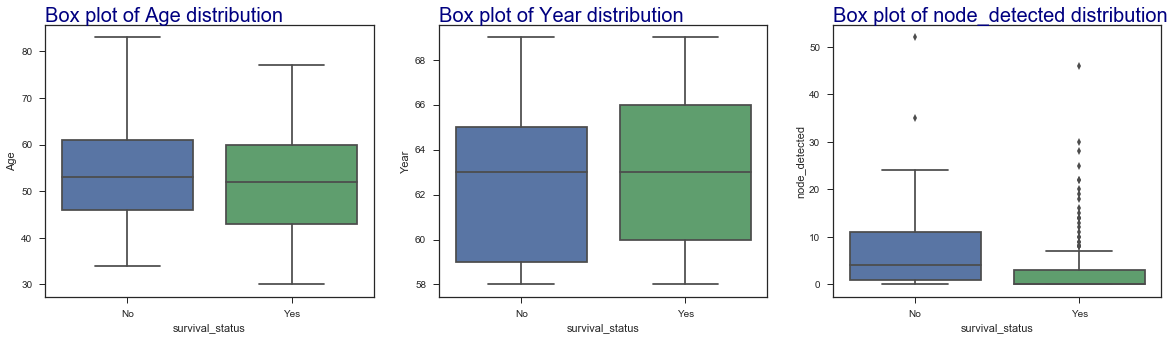

In [23]:
sb.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sb.boxplot(x='survival_status',y='Age', data=data)
plt.title("Box plot of Age distribution", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")

plt.subplot(1,3,2)
sb.boxplot(x='survival_status',y='Year', data=data)
plt.title("Box plot of Year distribution", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")

plt.subplot(1,3,3)
sb.boxplot(x='survival_status',y='node_detected', data=data)
plt.title("Box plot of node_detected distribution", fontsize=20, color="navy", loc="left", 
          fontstyle="normal", pad='3.0')
print("\n")

plt.show();

### OBSERVATION

<strong>
1- The patients who survived have positive axillary nodes of less than 5. 

2- The presence of points outside the whisker indicates the presence of outliers. 

3- The number of outliers in the Survived category(patients survived 5 years or longer) is considerably higher than the Died category(patients died within 5 years).

4- The median of the Died category and Q3 of the Survived category are apparently on the same line. Thus it is difficult to set a threshold to differentiate patients’ chances of survival.
The majority of patients who had an absence of positive axillary nodes survived breast cancer. Similarly, the majority of patients with a larger number of positive axillary nodes died.

5- We can also notice that few patients with a large number of positive axillary nodes have survived and, few patients with the absence of positive axillary nodes have died.
</strong>

### CONCLUSION

<strong>
1- Though there is major overlap among the features, we can retain positive axiliary node detected as the appropriate one 
    for the classication task.
    

2- Patients chance to survive is dependent on the number of positive axiliary node detected. Chances to survive decrease as 
   the positive axiliary node detected increases.
   
    
3- Our objective which is building a classification model of the survival status based on positive node detected feature
   will be a tricky one, this because of the overlap between the values of the survival status from our dataset. 
Thence, We would like to believe that an increase of the number of data points can help to get a clearer view.
</strong>